               Language  Tag_Count
0            javascript    1984250
1                  java    1659105
2                python    1397547
3                    c#    1397165
4                   php    1343648
..                  ...        ...
139  visual-studio-2010      46619
140          matplotlib      46525
141            pointers      46490
142        if-statement      46237
143           templates      45976

[144 rows x 2 columns]


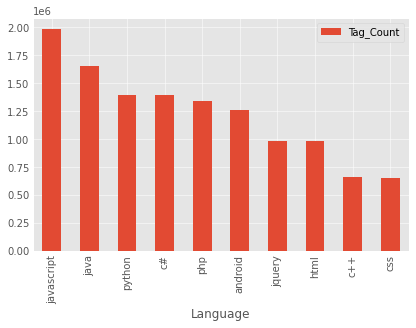

In [47]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

df = {'Language':[],'Tag_Count':[]}



def extract(url):
    temp=[]
    headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
    }
    content = requests.request("GET", url, headers=headers)
    soup = bs(content.text,'html.parser')
     
    for tag in soup.find_all('a',attrs={'class':'post-tag'}):
        df['Language'].append(tag.text)
    t1=soup.find_all('div',attrs={'class':'s-card js-tag-cell grid fd-column'})
    for count1 in t1:
        count=count1.find_all('div',attrs={'class':'mt-auto grid jc-space-between fs-caption fc-black-300'})
        for t2 in count:
            temp.append(t2.find('div',attrs={'class':'grid--cell'}).text)
    for i in temp:
        df['Tag_Count'].append(int(i[:-10]))
    
for i in range(1,5):
    extract('http://stackoverflow.com/tags?page='+str(i)+'&tab=popular')    
df2= pd.DataFrame(df)
print(df2)


style.use('ggplot')

df2.sort_values(by=['Tag_Count'],ascending=False).head(10).set_index('Language').plot(kind='bar')
plt.show()